## 차원이 많은 데이터의 장점

데이터에서 '차원'이란 변수의 개수를 의미합니다. 변수가 1개인 데이터는 1차원 데이터, 2개인 데이터는 2차원 데이터,  
n개인 데이터는 n차원 데이터라고 부릅니다. 예를 들어서, 아래와 같은 고객 정보 데이터가 있다고 해 볼게요.

In [7]:
import pandas as pd

user = pd.read_csv('data/custom_data.csv')
user.head(10)

,recency,age,children,spent_all,purchase_num_all,family_size
0,58,66,0,1617,25,1
1,38,69,2,27,6,3
2,26,58,0,776,21,2
3,26,39,1,53,8,3
4,94,42,1,422,19,3
5,16,56,1,716,22,3
6,34,52,1,590,21,2
7,32,38,1,169,10,3
8,19,49,1,46,6,3
9,68,73,2,49,2,4


위의 데이터는 변수가 6개이기 때문에 6차원 데이터입니다. 각 차원은 아래와 같은 정보를 가지고 있습니다.  
- `recency`: 최근 구매일로부터 경과일
- `age`: 나이
- `children`: 자녀 수
- `spent_all`: 총 구매 금액
- `purchase_num_all`: 총 구매 횟수
- `family_size`: 총 가족 구성원 수  

만약에 `recency`와 `age`라는 2개의 변수만 가지고 있는 2차원 데이터라면 자녀 수, 총 구매 금액, 총 구매 횟수, 총 가족 구성원 수 등의  
정보가 누락됩니다. `recency`, `age`, `children`, `spent_all`까지 4차원으로 구성된 데이터는  
총 구매 횟수, 총 가족 구성원 수 정보가 없죠. 반면, 6개의 변수가 모두 포함된 6차원의 데이터라면 차원이 낮은 데이터보다  
좀 더 많은 정보를 가지게 됩니다. 따라서, 차원이 높은 데이터를 분석에 활용하면 더 많은 정보를 반영한 결과를 얻을 수 있습니다.

## 차원의 저주란?
데이터의 차원이 높아지면 좀 더 많은 정보를 나타낼 수 있습니다. 때문에, 데이터에 있는 변수가 많으면 많을수록 무조건 좋은 거라고  
생각할 수 있는데요, 그렇지 않습니다. 오히려 데이터의 차원이 너무 많아지면 분석의 정확도가 떨어지는 경우도 있습니다.  
이런 현상을 차원의 저주라고 합니다.

차원의 저주가 발생하는 상황을 직접 확인하기 위해 `user` 데이터의 클러스터링 결과를 차원의 수에 따라 비교해 보겠습니다.

먼저, 6차원 데이터로 클러스터 개수 k를 1부터 9까지 바꿔가며 모델을 학습시킨 결과의 성능 지표인 inertia를 시각화한 그래프입니다.

<Axes: >

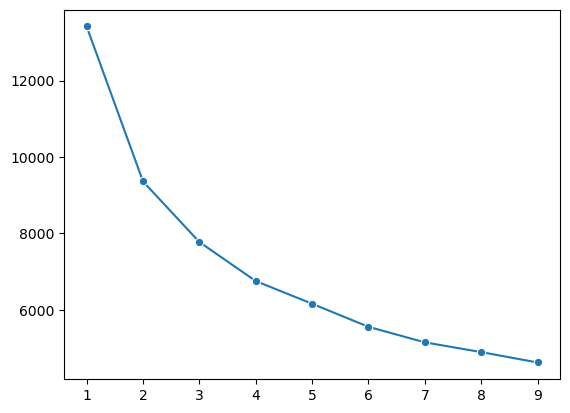

In [9]:
from sklearn.cluster import KMeans
import seaborn as sns
from matplotlib import pyplot as plt

# 데이터 스케일링
user_mean = user.mean()  # 각 컬럼의 평균값
user_std = user.std()    # 각 컬럼의 표준편차
scaled_df = (user - user_mean) / user_std  # 컬럼별 표준화

# 클러스터링
ks = range(1,10)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)  # 1~10까지 k의 개수를 지정하여 모델 생성
    model.fit(scaled_df)  # 모델 학습
    inertias.append(model.inertia_)

# 시각화
sns.lineplot(x=ks, y=inertias, marker='o')

다음으로, 6개의 차원을 2개 차원 축소시킨 후에 다시 k-means를 적용해 보겠습니다. 차원을 줄이는 데에는  
PCA라는 방법을 쓸 건데요. 그냥 고차원의 데이터를 저차원으로 바꾸는 데 사용되는 방법이라는 것이라고 이해하면 됩니다.

<Axes: >

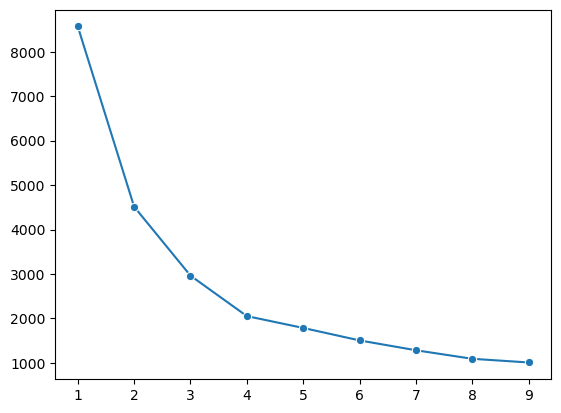

In [11]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)  # n_components: 유지할 차원의 개수

# PCA 적용
pca.fit(scaled_df)
scaled_df_pca = pca.transform(scaled_df)
pca_df = pd.DataFrame(scaled_df_pca)

# 클러스터링
ks = range(1,10)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(pca_df)
    inertias.append(model.inertia_)

# 시각화
sns.lineplot(x=ks, y=inertias, marker='o')

두 그래프를 비교해 보면, 차원이 2개인 데이터로 클러스터링 한 결과가 차원이 6개인 데이터로 클러스터링 한 결과보다 모든 클러스터 개수 k에서  
inertia 값이 작은 것을 알 수 있습니다. 즉, 차원의 개수가 더 작을수록 클러스터링의 결과로 모인 데이터들이  
더 많이 유사하고, 성능이 좋게 나오는 것이죠.  

이렇게 차원이 커지면 분석의 성능이 떨어지는 차원의 저주 문제가 발생합니다. 해당 문제를 해결하기 위해서는  
여러 방법이 있는데요, 이번 토픽에서는 여러 방법들 중 하나인 차원 축소에 대해서 알아보도록 합시다.